In [1]:
# use python 3.6 or 3.7 environment

https://docs.google.com/document/d/1oX3Gge4SD8X9sAu3j5J23fHmLajYFP7wNwZNF7FBxaw/edit

before end:
measure allowed reflections below and above resonance for normalization
.................
future: measure polarization - magnetic?

.................
cool cryostat to base temp

update sz ~
check refs ~ still there - not tweaked
go to Mn K edge and align ~
set pilatus paramemers ~
fluo scan ~
refine ub ~
scan threshold ~

select two energies close to resonance
look for forbidden reflection

found: check not m/s; measure resonance spectrum
not found: go to allowed reflection e.g. [0, 2, 2] and measure eta scans over sample position (night)

!!! ATS reeflections were found and were beautiful
Meaured spectra at 40K and 70K
No big difference but maybe small difference for 030
Good ATS data 023, 032, 003; bad alignment 030, 001

next:
look for mag below edge 032, 003, 023 (T=20K)
temp dep on res 032 (has looked like a small change?)
select reflections for more detailed search
scan over sample on resonance - find sweet spot.









good refs (forbidden):
[0, 0, 1], [0, 0, 3], [-1, 0, 0], [0, 1, 0], [-3, 0, 0], [0, 3, 0], [0, 2, 1], [0, 2, 3], [0, 1, 2], [0, 3, 2]










In [16]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/i16/data/2022/cm31138-6/%i.nxs'

<IPython.core.display.Javascript object>


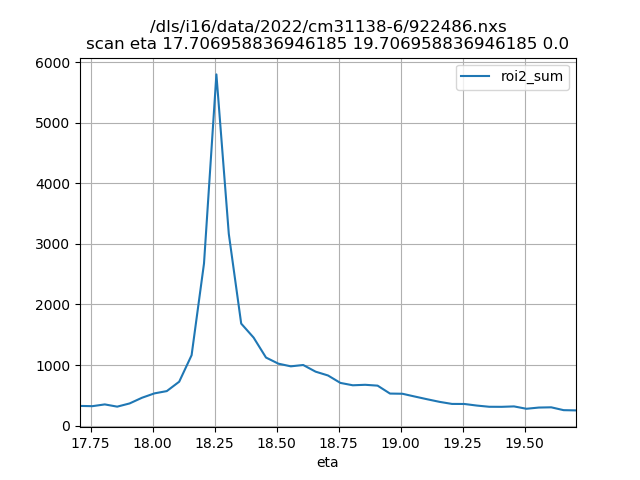

<IPython.core.display.Javascript object>


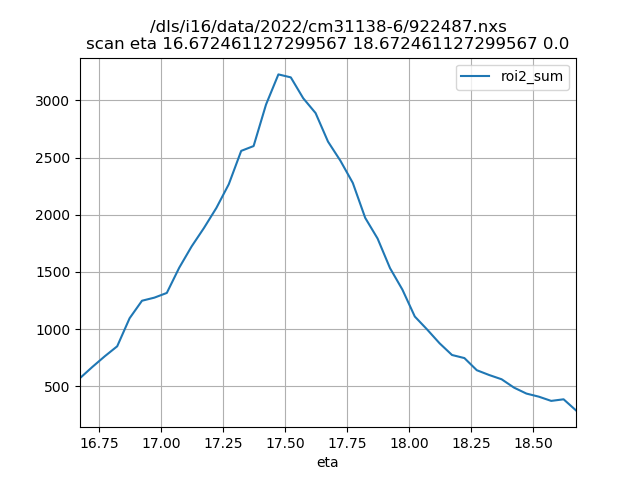

<IPython.core.display.Javascript object>


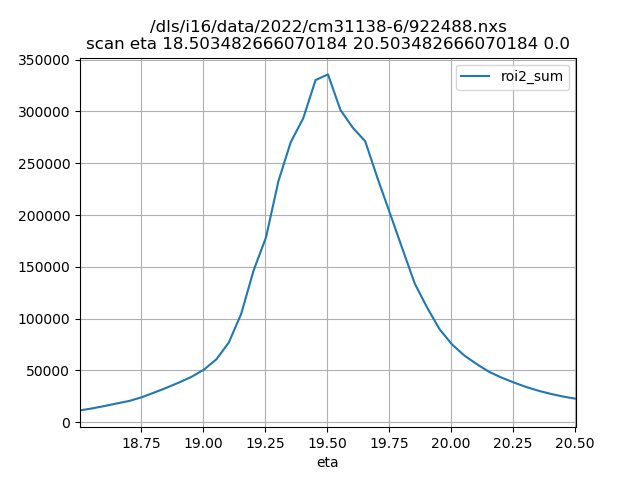

<IPython.core.display.Javascript object>


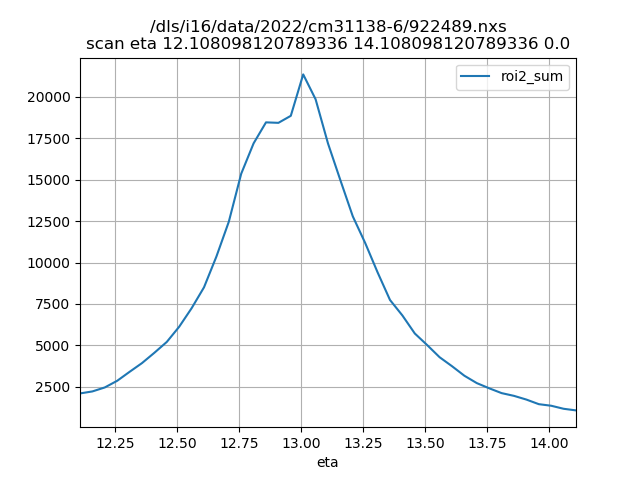

<IPython.core.display.Javascript object>


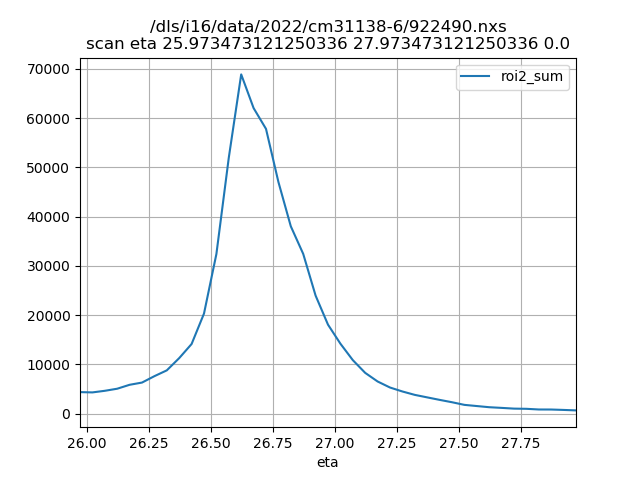

<IPython.core.display.Javascript object>


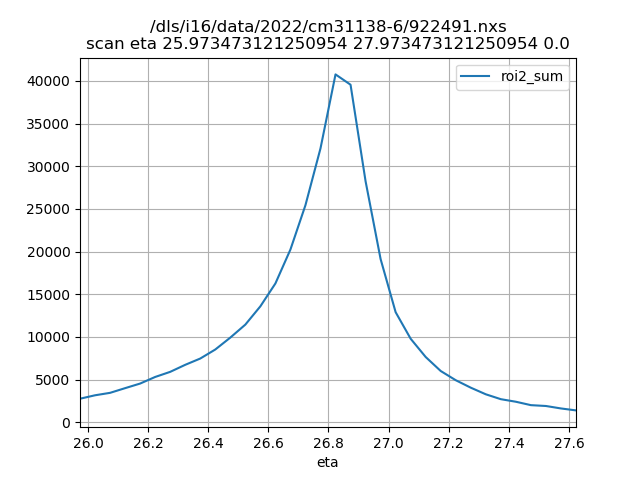

In [39]:
#  ENERGY     H     K     L       PHI      CHI      ETA       MU    DELTA      GAM  TAG
#1 11.217  2.00  2.00  0.00   238.0000   6.1500  19.1535   0.0000  37.4070   0.0000  220 on side
#2 11.217  2.00 -1.00  1.00   158.0000   9.5000  22.5070   0.0000  35.4139   0.0000  
#3 11.217  2.00 -1.00  1.00   158.0000   9.3000  22.5470   0.0000  35.3639   0.0000  2m11 on side
#4 11.217  2.00 -1.00 -1.00   163.0097   9.4759  17.5525   0.0000  35.3449   0.0000  same as 2m11 but reindexed 2m1m1
#5 11.217  0.00  0.00  2.00  -24.9806  46.1053  19.8835   0.0000  39.0070   0.0000  not great
#6 11.217  0.00  0.00  2.00  -24.9806  45.9053  20.0535   0.0000  39.0070   0.0000  002 sx sy sz aligned better


#figure()
#[2,2,0], [2,-1,-1], [0,0,2], [2,0,0], [4,0,0], [0 -4, 0] # 11.217 keV first two refs on edge but not good sx sy for edge
for scan in range(922486, 922491+1):
    n = pdnx(p % scan)
    n.plt('eta', 'roi2_sum')
    #plot(n.eta, n.roi2_sum)

<IPython.core.display.Javascript object>


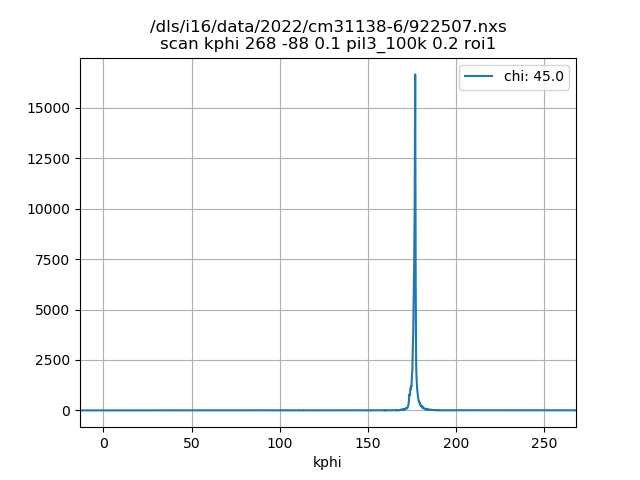

<IPython.core.display.Javascript object>


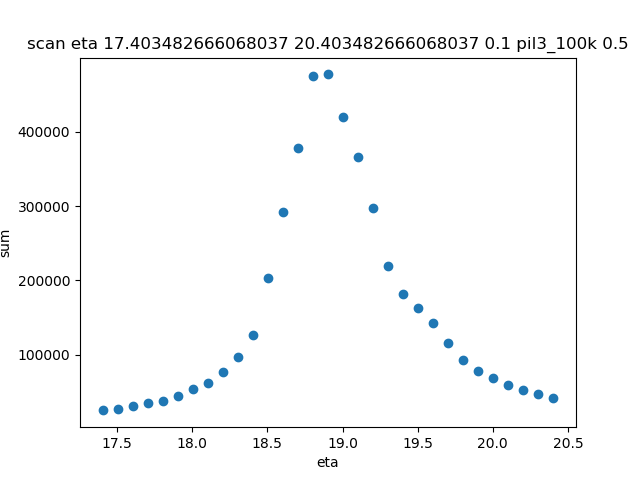

In [61]:
#gda script
#sample on cryostat
#922492
#refs = [[0,0,2]]
#or ref in refs:
#   pos eta c2th(ref)/2 delta c2th(ref)
#   pos atten 255 #2%
#   chi_inc = 3
#   for chival in frange(90, 0, 2*chi_inc):
#       pos kphi -85 # not too close to -90 when chi increments
#       pos chi chival
#       #cvscan kphiZebra -88 268 .1 kphiZebraPil3 .04
#       scan kphi -88 268 .1 pil .2 scroi
#       inc chi -chi_inc
#       #cvscan kphiZebra 268 -88 -.1 kphiZebraPil3 .04
#       scan kphi 268 -88 .1 pil .2 scroi

#script stopped after chi = 45 deg - peak found

#for scan in range(922492, 922507+1):
for scan in range(922507, 922507+1):
    n = pdnx(p % scan)
    chival = n.nx.entry1.before_scan.diffractometer_sample.chi
    n.plt('kphi', 'roi1_sum', label=('chi: %.1f' % chival))

n = pdnx(p % 922511)
figure()
n.nx.plot()

# 002 same as the one fiound before re-mounting. This is it! (Horrible)
# get new UB and cool...
# phi now increased by ~ 181.4 deg - add this to previous phi



<IPython.core.display.Javascript object>


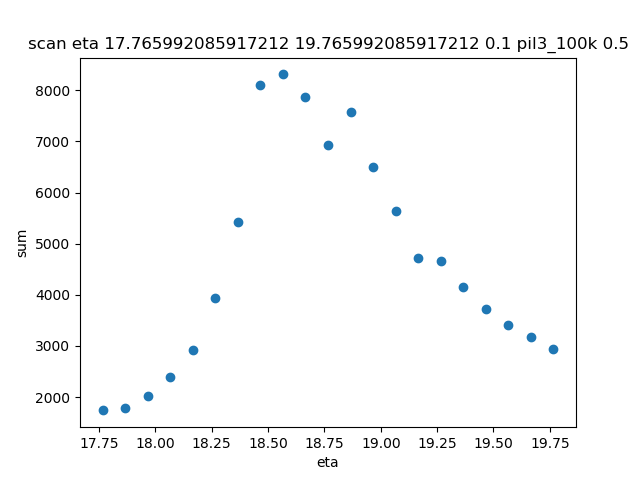

In [69]:
#220 from edge of sample (not face) after mounting on cryostat. Nasty but this is not a face.
n = pdnx(p % 922518)
figure()
n.nx.plot()

<IPython.core.display.Javascript object>


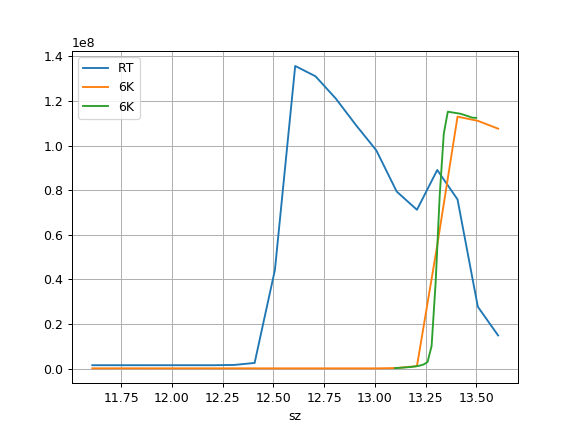

<IPython.core.display.Javascript object>


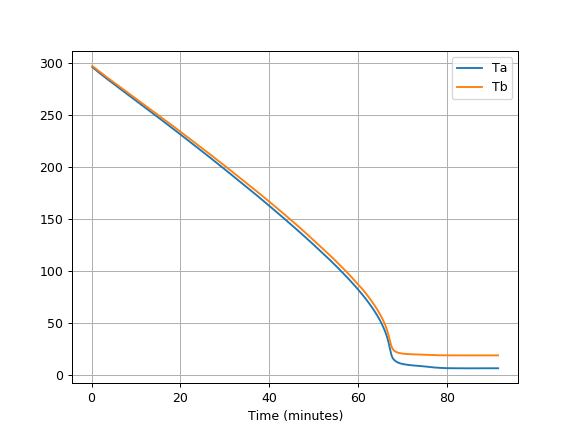

In [90]:
#220 from edge of sample (not face) after mounting on cryostat. Nasty but this is not a face.
n = pdnx(p % 922519)
figure()
plot(n.sz, n['sum'], label = 'RT')
xlabel('sz')
n = pdnx(p % 922522)
plot(n.sz, n['sum'], label = '6K')
n = pdnx(p % 922523)
plot(n.sz, n['sum'], label = '6K')
legend(); grid(1)

n = pdnx(p % 922520)
figure()
plot(n.x/6., n.Ta, label='Ta')
plot(n.x/6., n.Tb, label='Tb')
xlabel('Time (minutes)')
legend(); grid(1)


<IPython.core.display.Javascript object>


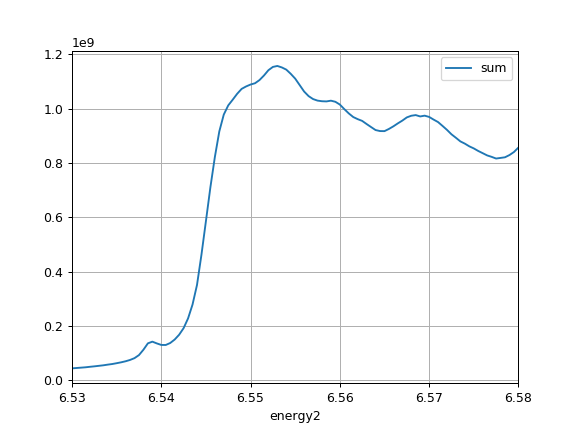

In [92]:
n = pdnx(p % 922528)
n.plot('energy2', 'sum'); grid()
# pre-edge: 6.5385
# half edge: 6.545

<IPython.core.display.Javascript object>


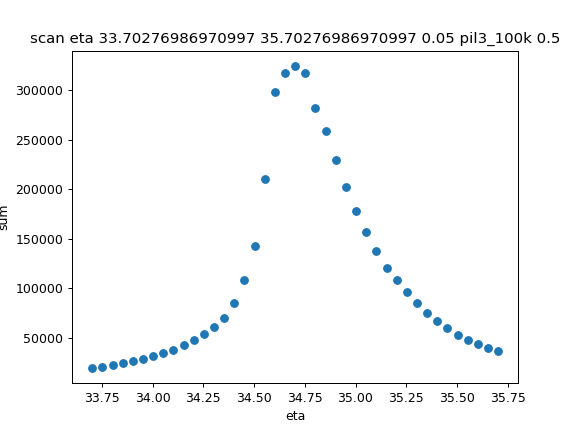

<IPython.core.display.Javascript object>


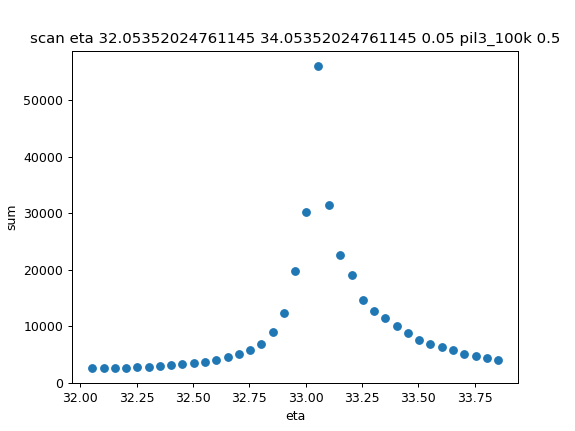

In [94]:
#002
n = pdnx(p % 922531)
figure(); n.nx.plot()

#220
n = pdnx(p % 922535)
figure(); n.nx.plot()

<IPython.core.display.Javascript object>


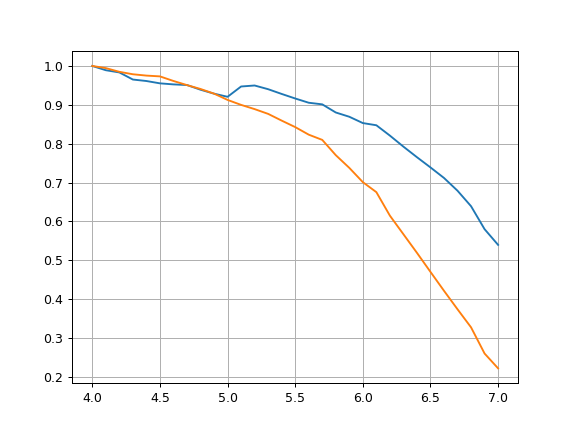

In [101]:
figure()
n = pdnx(p % 922537)
plot(n.pil3_tresh, n.roi2_sum/np.max(n.roi2_sum))
n = pdnx(p % 922540)
plot(n.pil3_tresh, n['sum']/np.max(n['sum']))
grid()
#use threshold 7.0?


<IPython.core.display.Javascript object>


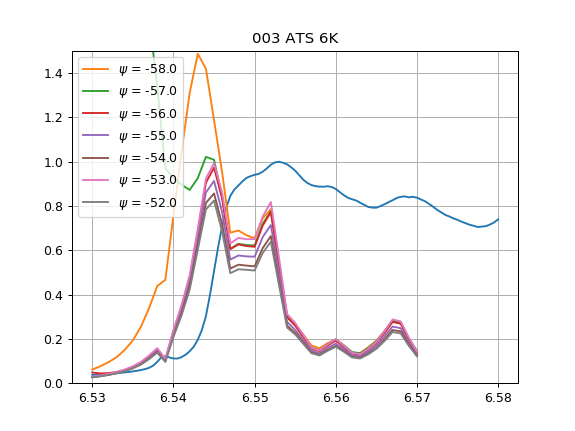

In [137]:
figure()
n = pdnx(p % 922528)
plot(n.energy2, n['sum']/max(n['sum'])); grid()

for scan in range(922547, 922559+1, 2):
    n = pdnx(p % scan)
    psival = n.nx.entry1.before_scan.psi.psi 
    plot(n.energy2, n.roi2_sum/5e7, label = '$\psi$ = %.1f' % psival); grid()
ylim([0, 1.5]); legend()
title('003 ATS 6K'); grid()

#wow - not bad for a shit sample!!

<IPython.core.display.Javascript object>


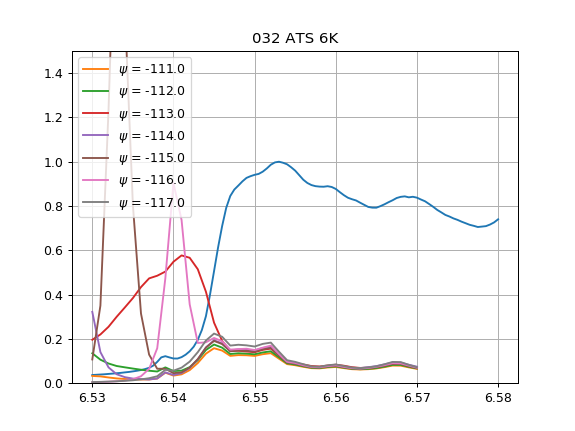

In [146]:
figure()
n = pdnx(p % 922528)
plot(n.energy2, n['sum']/max(n['sum'])); grid()

for scan in range(922563, 922575+1, 2):
    n = pdnx(p % scan)
    psival = n.nx.entry1.before_scan.psi.psi 
    plot(n.energy2, n.roi2_sum/5e7, label = '$\psi$ = %.1f' % psival); grid()
ylim([0, 1.5]); legend()
title('032 ATS 6K'); grid()
#weaker and different shape at pre-edge

<IPython.core.display.Javascript object>


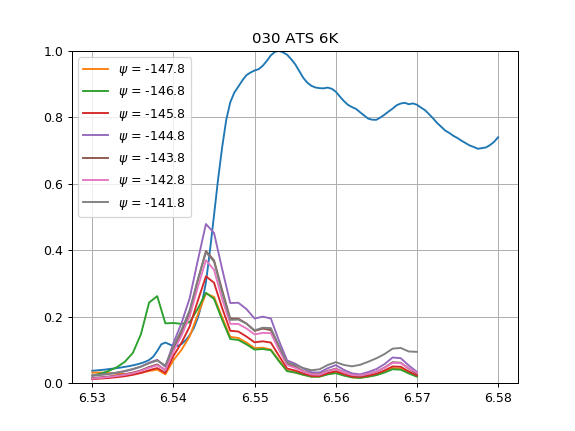

In [160]:
figure()
n = pdnx(p % 922528)
plot(n.energy2, n['sum']/max(n['sum'])); grid()

for scan in range(922583, 922595+1, 2):
    n = pdnx(p % scan)
    psival = n.nx.entry1.before_scan.psi.psi 
    plot(n.energy2, (n.medroi_sum-n.medbgroi_sum)/5e6, label = '$\psi$ = %.1f' % psival); grid()
ylim([0, 1]); legend()
title('030 ATS 6K'); grid()
#weaker and different shape at pre-edge

<IPython.core.display.Javascript object>


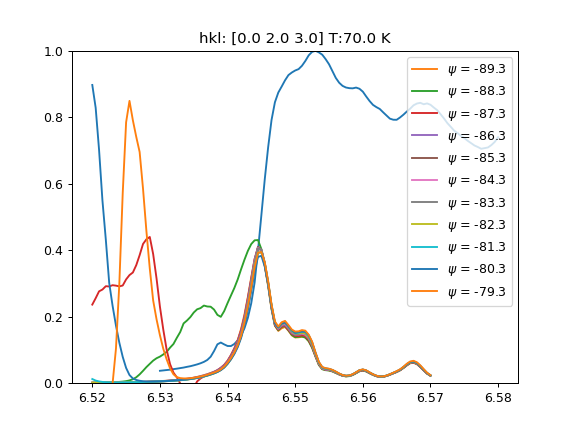

<IPython.core.display.Javascript object>


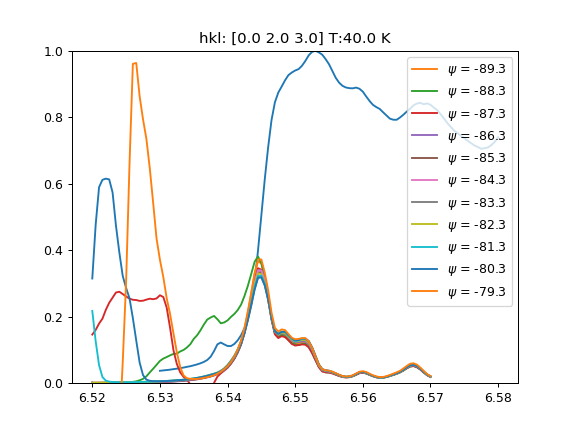

<IPython.core.display.Javascript object>


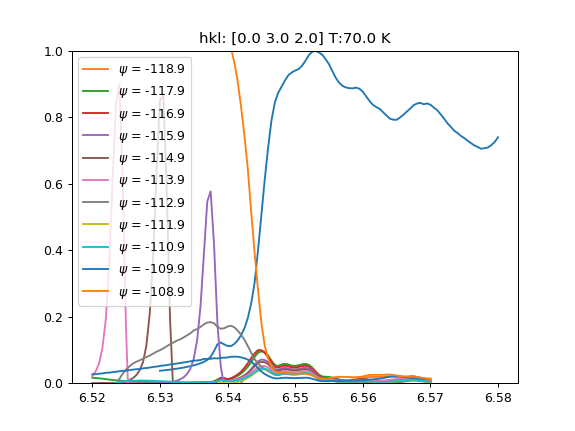

<IPython.core.display.Javascript object>


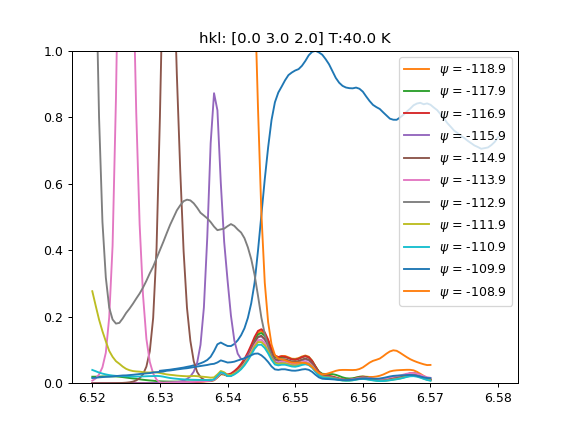

<IPython.core.display.Javascript object>


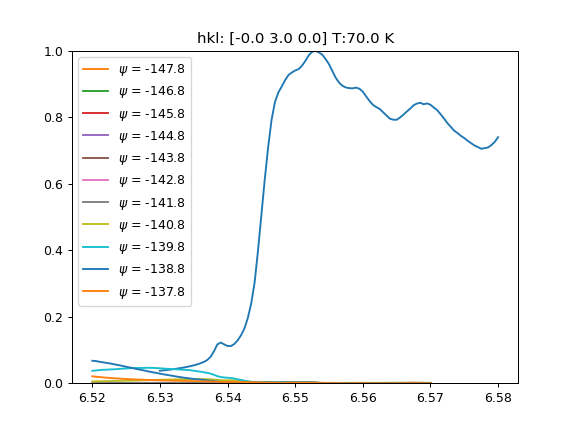

<IPython.core.display.Javascript object>


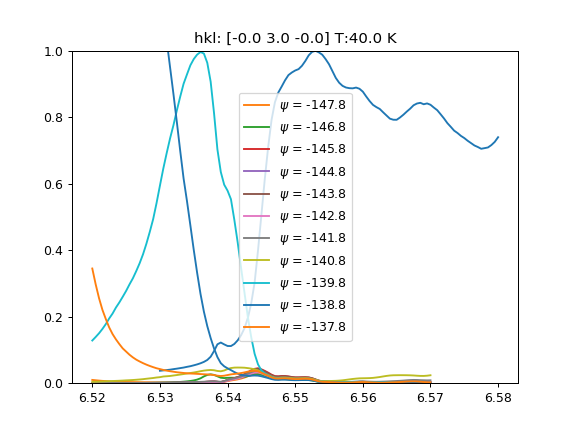

<IPython.core.display.Javascript object>


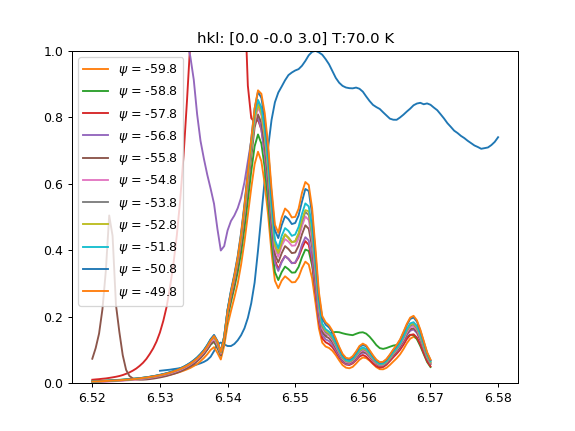

<IPython.core.display.Javascript object>


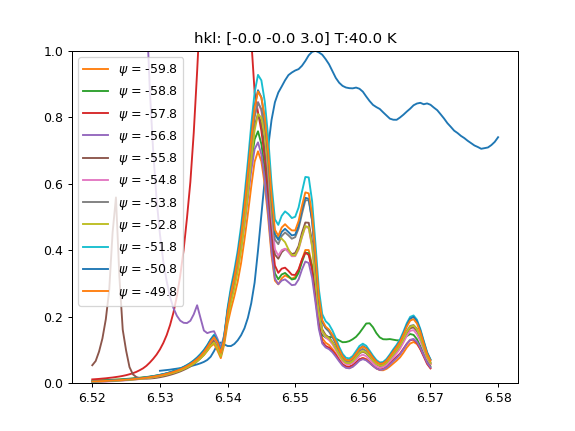

<IPython.core.display.Javascript object>


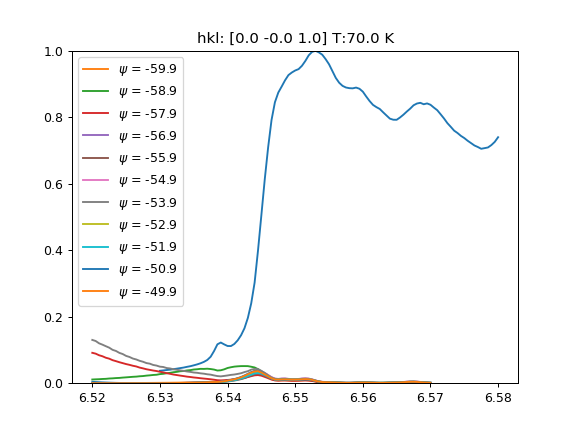

<IPython.core.display.Javascript object>


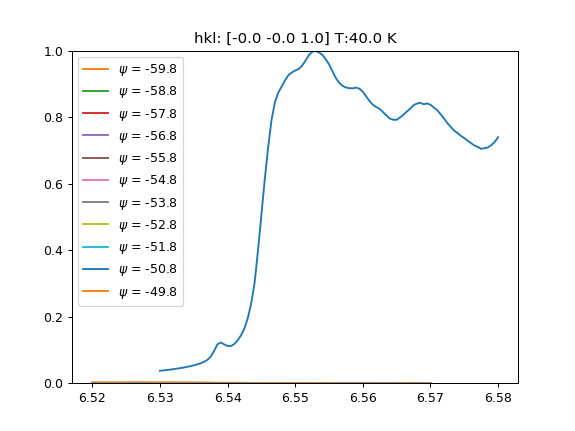

In [196]:
#922620 start
#refs = [[0, 2, 3], [0, 3, 2], [0, 3, 0], [0, 0, 3], [0, 0, 1], [0, 1, 0]]
#temps = [70, 40]

scans_023_70K = range(922625, 922645+1, 2)
scans_023_40K = range(922651, 922671+1, 2)

scans_032_70K = range(922677, 922697+1, 2)
scans_032_40K = range(922703, 922723+1, 2)

scans_030_70K = range(922729, 922749+1, 2)
scans_030_40K = range(922755, 922775+1, 2)

scans_003_70K = range(922781, 922801+1, 2)
scans_003_40K = range(922807, 922827+1, 2)

scans_001_70K = range(922833, 922853+1, 2)
scans_001_40K = range(922859, 922879+1, 2)



def plt_spec_1(scans):
    
    figure()
    n = pdnx(p % 922528)
    plot(n.energy2, n['sum']/max(n['sum'])); grid()

    for scan in scans:
        n = pdnx(p % scan)
        psival = n.nx.entry1.before_scan.psi.psi 
        plot(n.energy2, (n.medroi_sum-n.medbgroi_sum)/5e7, label = '$\psi$ = %.1f' % psival); grid()

    h = '%.1f' % n.nx.entry1.before_scan.diffractometer_sample.h
    k = '%.1f' % n.nx.entry1.before_scan.diffractometer_sample.k 
    l = '%.1f' % n.nx.entry1.before_scan.diffractometer_sample.l
    Ta = n.Ta[0]

    title('hkl: [%s %s %s] T:%.1f K' % (h, k, l, Ta))
    ylim([0, 1]); legend()

plt_spec_1(scans_023_70K)
plt_spec_1(scans_023_40K)
plt_spec_1(scans_032_70K)
plt_spec_1(scans_032_40K)
plt_spec_1(scans_030_70K)
plt_spec_1(scans_030_40K)
plt_spec_1(scans_003_70K)
plt_spec_1(scans_003_40K)
plt_spec_1(scans_001_70K)
plt_spec_1(scans_001_40K)

#023, 032, 003 good
#030, 001 bad alignment
#032 relatively weak and slightly different spectra for 40K and 70 K ??




In [190]:
for scan in range(922620, 923000):

        n = pdnx(p % scan)
        cmd = n.nx.entry1.scan_command
        h = '%.1f' % n.nx.entry1.before_scan.diffractometer_sample.h
        k = '%.1f' % n.nx.entry1.before_scan.diffractometer_sample.k 
        l = '%.1f' % n.nx.entry1.before_scan.diffractometer_sample.l
        try:
            Ta = n.nx.entry1.before_scan.Ta.Ta
        except:
            Ta = n.Ta[0]
        print(scan, h, k, l, Ta, cmd)




922620 -0.0 1.9 3.0 70.0691 scan eta 69.78177772713674 71.78177772713674 0.1 pil3_100k 0.5
922621 0.0 2.0 3.0 70.0339 scan chi 55.48532338916773 56.48532338916773 0.05 pil3_100k 0.5 roi4
922622 0.0 2.0 3.0 70.0185 scan delta 141.063555454273 142.063555454273 0.05 pil3_100k 0.5 roi3
922623 0.0 2.0 3.0 70.0113 scan eta 70.28177772713707 71.28177772713707 0.05 pil3_100k 0.5 roi2
922624 0.0 2.0 3.0 70.006 scan eta 66.83982578016686 67.83982578016686 0.05 pil3_100k 0.5 roi2
922625 0.0 2.0 3.0 70.0032 scan energy 6.52 6.57 5.0E-4 hkl [0.01728801870939945, 2.0010722170055164, 2.997445494757857] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922626 0.0 2.0 3.0 69.9983 scan eta 67.51589392990336 68.51589392990336 0.05 pil3_100k 0.5 roi2
922627 0.0 2.0 3.0 69.9983 scan energy 6.52 6.57 5.0E-4 hkl [0.017288018709389185, 2.001072217005523, 2.997445494757855] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922628 0.0 2.0 3.0 69.9982 scan eta 68.19351740726006 69.19351740726006 0.05 pil3_100k 0.5 roi2


922688 0.0 3.0 2.0 69.9984 scan eta 55.109772929358876 56.109772929358876 0.05 pil3_100k 0.5 roi2
922689 0.0 3.0 2.0 69.9987 scan energy 6.52 6.57 5.0E-4 hkl [0.025406892382191515, 3.0088138191843647, 1.9913343242959503] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922690 0.0 3.0 2.0 69.9982 scan eta 55.88822209224182 56.88822209224182 0.05 pil3_100k 0.5 roi2
922691 0.0 3.0 2.0 69.9983 scan energy 6.52 6.57 5.0E-4 hkl [0.026837996021480848, 3.006444373228203, 1.992967577831502] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922692 0.0 3.0 2.0 69.9983 scan eta 56.66562285906507 57.66562285906507 0.05 pil3_100k 0.5 roi2
922693 0.0 3.0 2.0 69.9984 scan energy 6.52 6.57 5.0E-4 hkl [0.026837996021511823, 3.0064443732281996, 1.9929675778315041] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922694 0.0 3.0 2.0 69.9982 scan eta 57.44145498071843 58.44145498071843 0.05 pil3_100k 0.5 roi2
922695 0.0 3.0 2.0 69.9982 scan energy 6.52 6.57 5.0E-4 hkl [0.030594580995517262, 2.9991773245205575, 1.9979

922755 -0.0 3.0 -0.0 39.9952 scan energy 6.52 6.57 5.0E-4 hkl [-0.0015014261133028395, 2.999979438371127, -0.007455788667076968] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922756 0.0 3.0 0.0 40.0006 scan eta 25.942836053025175 26.942836053025175 0.05 pil3_100k 0.5 roi2
922757 -0.0 3.0 -0.0 40.0006 scan energy 6.52 6.57 5.0E-4 hkl [-0.0015014261132992868, 2.9999794383711276, -0.007455788667070418] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922758 0.0 3.0 0.0 39.9997 scan eta 28.256243012792318 29.256243012792318 0.05 pil3_100k 0.5 roi2
922759 -0.0 3.0 -0.0 40.0012 scan energy 6.52 6.57 5.0E-4 hkl [-0.001501426113315496, 2.9999794383711267, -0.0074557886670998386] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922760 0.0 3.0 0.0 39.9991 scan eta 30.59459073800633 31.59459073800633 0.05 pil3_100k 0.5 roi2
922761 -0.0 3.0 -0.0 39.9993 scan energy 6.52 6.57 5.0E-4 hkl [-0.001501426113310833, 2.9999794383711276, -0.007455788667081853] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922762

922819 -0.0 -0.0 3.0 39.9935 scan energy 6.52 6.57 5.0E-4 hkl [-0.0011121084093468347, -0.0015794132605624345, 2.9992246901751303] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922820 -0.0 -0.0 3.0 39.9986 scan eta 60.6883174773357 61.6883174773357 0.05 pil3_100k 0.5 roi2
922821 -0.0 -0.0 3.0 39.9977 scan energy 6.52 6.57 5.0E-4 hkl [-0.0011121084093597133, -0.0015794132605371214, 2.99922469017513] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922822 -0.0 -0.0 3.0 39.9991 scan eta 61.615310643334084 62.615310643334084 0.05 pil3_100k 0.5 roi2
922823 -0.0 -0.0 3.0 39.9987 scan energy 6.52 6.57 5.0E-4 hkl [-0.00111210840935283, -0.0015794132605666533, 2.9992246901751294] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi
922824 -0.0 -0.0 3.0 39.9989 scan eta 62.540022431572936 63.540022431572936 0.05 pil3_100k 0.5 roi2
922825 -0.0 -0.0 3.0 40.0006 scan energy 6.52 6.57 5.0E-4 hkl [-0.0011121084094005695, -0.0015794132605768674, 2.9992246901751294] pil3_100k 0.5 tset Ta Tb roi2 medbgroi medroi


RecursionError: maximum recursion depth exceeded while calling a Python object

<IPython.core.display.Javascript object>


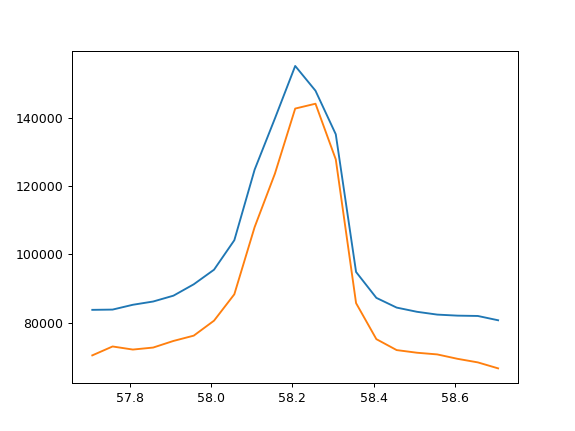

In [201]:
#032 below edge 6.3 keV T=20K

figure()
n = pdnx(p % 922892)
plot(n.eta, n.roi2_sum, label='atten 0')
n = pdnx(p % 922893)
plot(n.eta, n.roi2_sum/0.085, label='atten 10 (8.5%) rescaled')

#ok - not harmonic



<IPython.core.display.Javascript object>


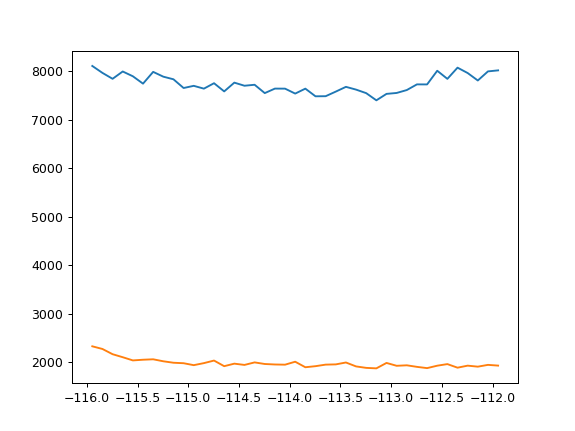

In [204]:
#scancn psic .1 41 hkl hh032_6p3kev phi pil .5 lcroi medbgroi medroi
figure()
n = pdnx(p % 922895)
plot(n.psi, n.medroi_sum)
plot(n.psi, n.medbgroi_sum)

#ok - not multiple scattering (probably)
# what's left?
# tail of resonance
# tail of multiple scattering
# magnetism
# impurity/strain ### strain could break symmetry ...






<IPython.core.display.Javascript object>


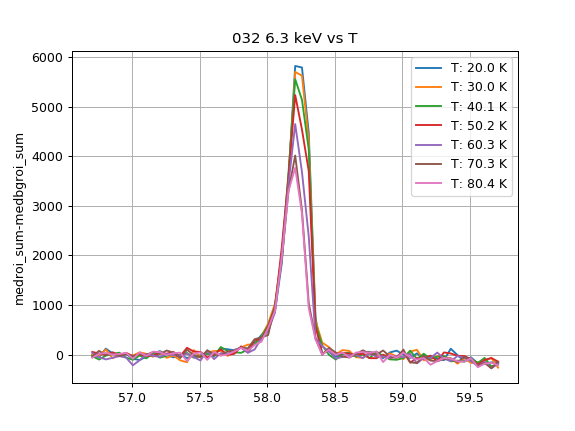

<IPython.core.display.Javascript object>


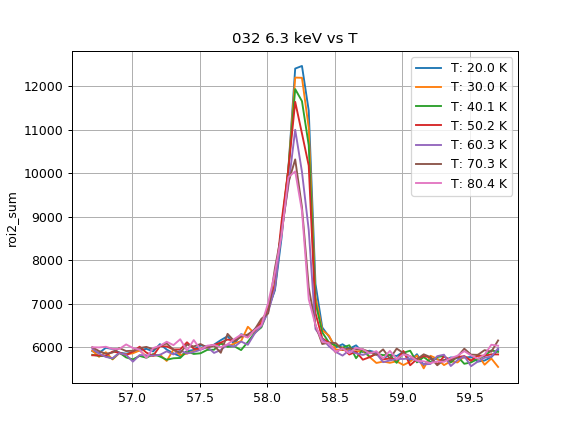

Text(0.5, 1.0, '032 6.3 keV vs T')

In [216]:
#922896
figure()
for scan in range(922896, 922902+1):
    n = pdnx(p % scan)
    plot(n.eta, n.medroi_sum-n.medbgroi_sum, label = 'T: %.1f K' % n.Ta[0])
ylabel('medroi_sum-medbgroi_sum')
legend(); grid(1); title('032 6.3 keV vs T')

figure()
for scan in range(922896, 922902+1):
    n = pdnx(p % scan)
    plot(n.eta, n.roi2_sum, label = 'T: %.1f K' % n.Ta[0])
ylabel('roi2_sum')
legend(); grid(1); title('032 6.3 keV vs T')


<IPython.core.display.Javascript object>


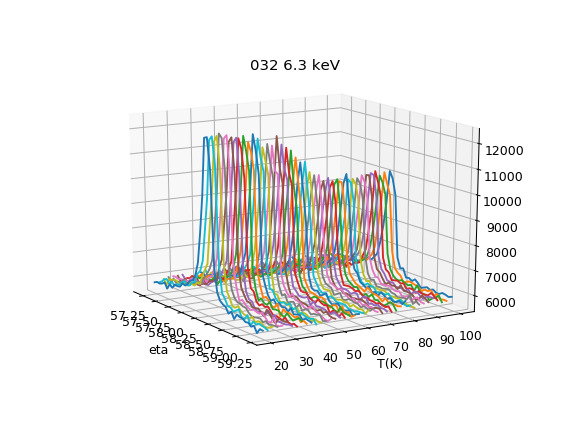

Text(0.5, 0.92, '032 6.3 keV')

In [226]:
from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(922903, 922944+1):
    try:
        n = pdnx(p % i)
        ax.plot(n.eta, n.Ta, n.roi2_sum); xlabel('eta'); ylabel('T(K)')
    except:
        break
title('032 6.3 keV')

#~30 % is magnetic or magnetically induced

<IPython.core.display.Javascript object>


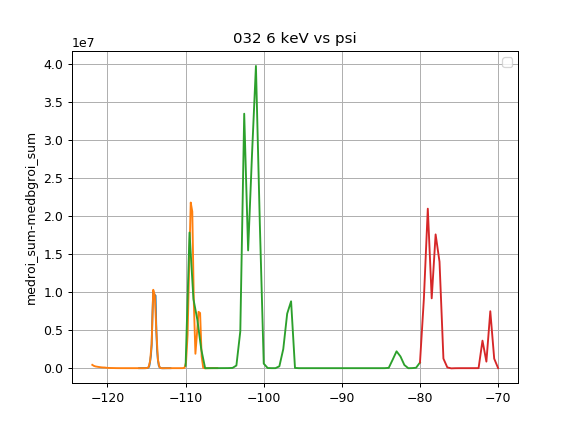

No handles with labels found to put in legend.


Text(0.5, 1.0, '032 6 keV vs psi')

In [230]:

figure()
for scan in [922948, 922949, 922951, 922952]:
    n = pdnx(p % scan)
    plot(n.psi, n.medroi_sum-n.medbgroi_sum)
ylabel('medroi_sum-medbgroi_sum')
legend(); grid(1); title('032 6 keV vs psi')

# quite bad m/s but symmetric and goos around -90


<IPython.core.display.Javascript object>


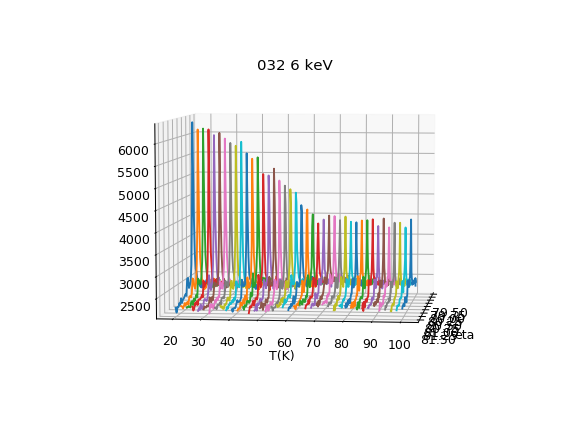

=== Error loading NeXus file /dls/i16/data/2022/cm31138-6/922999.nxs


Text(0.5, 0.92, '032 6 keV')

In [246]:
from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(922958, 999999+1):
    try:
        n = pdnx(p % i)
        ax.plot(n.eta, n.Ta, n.roi2_sum); xlabel('eta'); ylabel('T(K)')
    except:
        break
title('032 6 keV')

#~ 50% magnetic or magnetically induced
# can get chi ~ 90 for magnet access with:
# psi ~ -30 eta ~101
# psi ~150 eta ~ 25
#check these settings in anticipation of mounting magnet



<IPython.core.display.Javascript object>


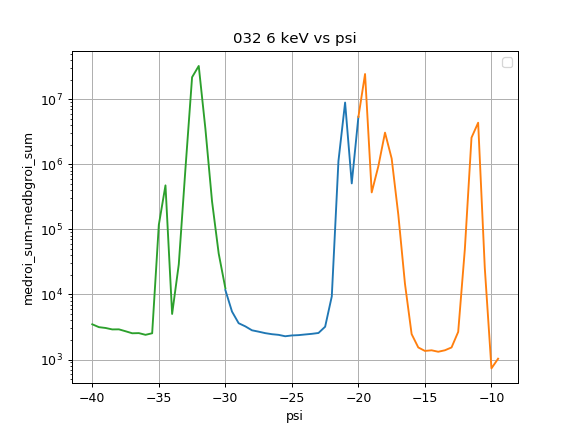

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


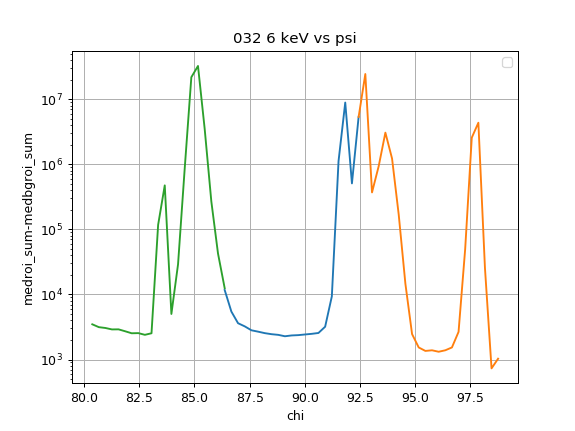

No handles with labels found to put in legend.


Text(0.5, 1.0, '032 6 keV vs psi')

In [256]:
figure()
for scan in range(923008, 923010+1):
    n = pdnx(p % scan)
    semilogy(n.psi, n.medroi_sum-n.medbgroi_sum)
xlabel('psi')
ylabel('medroi_sum-medbgroi_sum')
legend(); grid(1); title('032 6 keV vs psi')

figure()
for scan in range(923008, 923010+1):
    n = pdnx(p % scan)
    semilogy(n.chi, n.medroi_sum-n.medbgroi_sum)
xlabel('chi')
ylabel('medroi_sum-medbgroi_sum')
legend(); grid(1); title('032 6 keV vs psi')



# quite bad m/s but symmetric and goos around -90

<IPython.core.display.Javascript object>


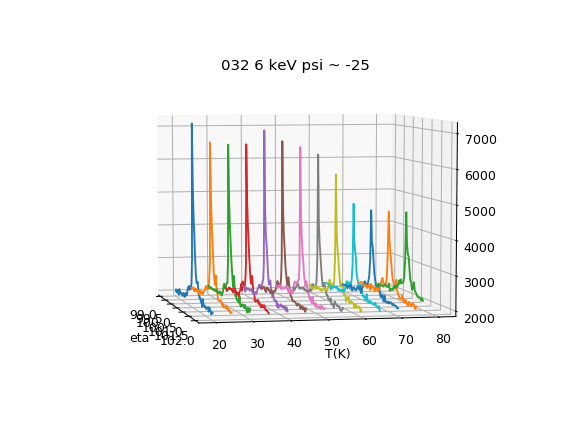

=== Error loading NeXus file /dls/i16/data/2022/cm31138-6/923024.nxs


Text(0.5, 0.92, '032 6 keV psi ~ -25')

In [261]:
from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(923011, 999999+1):
    try:
        n = pdnx(p % i)
        ax.plot(n.eta, n.Ta, n.roi2_sum); xlabel('eta'); ylabel('T(K)')
    except:
        break
title('032 6 keV psi ~ -25')

#~ 40% magnetic or magnetically induced


<IPython.core.display.Javascript object>


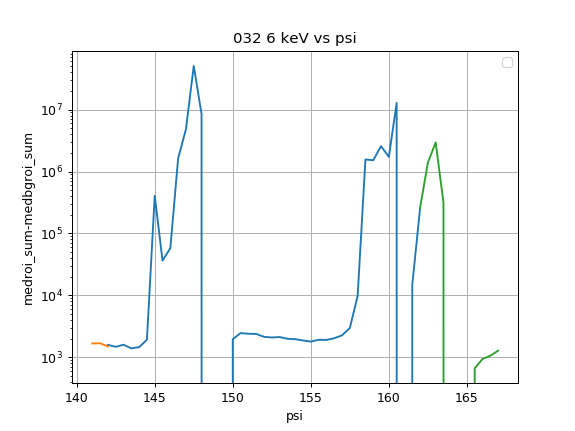

No handles with labels found to put in legend.


Text(0.5, 1.0, '032 6 keV vs psi')

In [264]:
figure()
for scan in [923031, 923037, 923038]:
    n = pdnx(p % scan)
    semilogy(n.psi, n.medroi_sum-n.medbgroi_sum)
xlabel('psi')
ylabel('medroi_sum-medbgroi_sum')
legend(); grid(1); title('032 6 keV vs psi')
#psi 155 looks ok chi ~  90.5

<IPython.core.display.Javascript object>


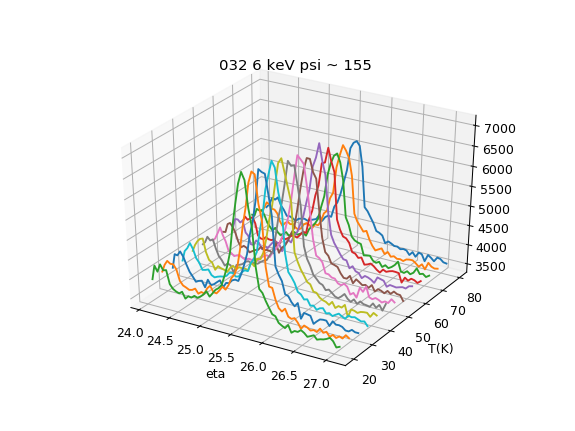

Text(0.5, 0.92, '032 6 keV psi ~ 155')

In [275]:
from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(923039, 923051+1):
    try:
        n = pdnx(p % i)
        ax.plot(n.eta, n.Ta, n.roi2_sum); xlabel('eta'); ylabel('T(K)')
    except:
        break
title('032 6 keV psi ~ 155')

#very small magnetic signal

<IPython.core.display.Javascript object>


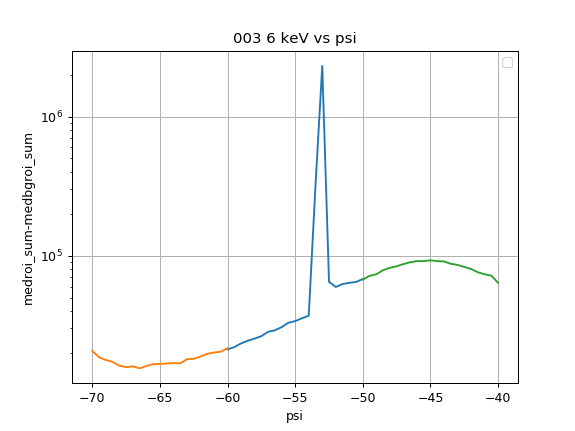

No handles with labels found to put in legend.


Text(0.5, 1.0, '003 6 keV vs psi')

In [278]:
figure()
for scan in [923057, 923058, 923059]:
    n = pdnx(p % scan)
    semilogy(n.psi, n.medroi_sum-n.medbgroi_sum)
xlabel('psi')
ylabel('medroi_sum-medbgroi_sum')
legend(); grid(1); title('003 6 keV vs psi')
#look at psi -65 and phi -45

<IPython.core.display.Javascript object>


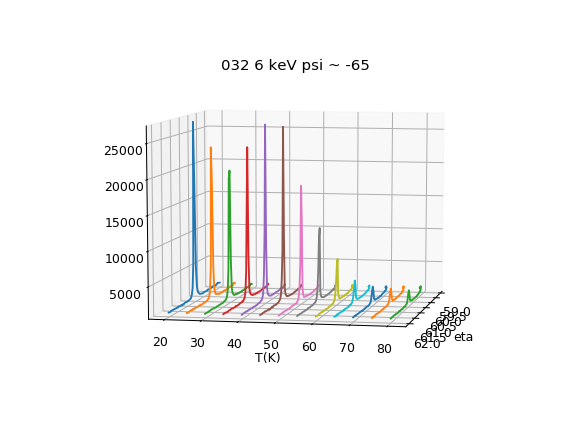

Text(0.5, 0.92, '032 6 keV psi ~ -65')

In [288]:
from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(923061, 923073+1):
    try:
        n = pdnx(p % i)
        #ax.plot(n.eta, n.Ta, n.roi2_sum); xlabel('eta'); ylabel('T(K)')
        ax.plot(n.eta, n.Ta, n.medroi_sum); xlabel('eta'); ylabel('T(K)')
    except:
        break
title('032 6 keV psi ~ -65')

#can't see any change in lcroi
#big signal below TN


<IPython.core.display.Javascript object>


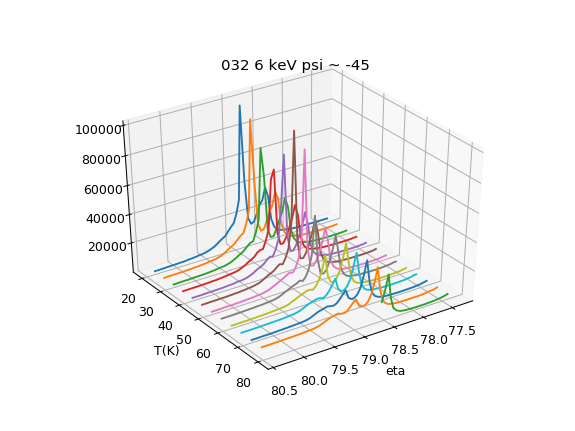

Text(0.5, 0.92, '032 6 keV psi ~ -45')

In [293]:
from mpl_toolkits import mplot3d

ax = figure().gca(projection='3d')
for i in range(923074, 923086+1):
    try:
        n = pdnx(p % i)
        #ax.plot(n.eta, n.Ta, n.roi2_sum); xlabel('eta'); ylabel('T(K)')
        ax.plot(n.eta, n.Ta, n.medroi_sum); xlabel('eta'); ylabel('T(K)')
    except:
        break
title('032 6 keV psi ~ -45')

#can't see any change in lcroi
#big signal below TN

<IPython.core.display.Javascript object>


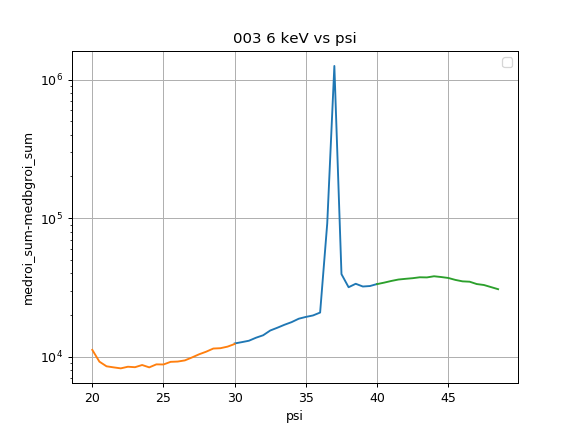

No handles with labels found to put in legend.


Text(0.5, 1.0, '003 6 keV vs psi')

In [297]:
figure()
for scan in [923094, 923095, 923096]:
    n = pdnx(p % scan)
    semilogy(n.psi, n.medroi_sum-n.medbgroi_sum)
xlabel('psi')
ylabel('medroi_sum-medbgroi_sum')
legend(); grid(1); title('003 6 keV vs psi')
#psi 44 good

In [239]:
n = pdnx(p % 922958)

In [240]:
n

Ta  count_time        eta  maxval   maxx   maxy  medbgroi_maxval  medbgroi_maxx  medbgroi_maxy  medbgroi_sum  medroi_maxval  medroi_maxx  medroi_maxy  medroi_sum  path  roi2_maxval  roi2_maxx  roi2_maxy  roi2_sum       sum
0   20.0002         0.5  79.533193    13.0  373.0  160.0              4.0           10.0            5.0         715.0            5.0         18.0          7.0       785.0   1.0          5.0       39.0        2.0    2335.0  125777.0
1   20.0002         0.5  79.583193    12.0  439.0    1.0              5.0            0.0           21.0         746.0            5.0         14.0         15.0       716.0   2.0          6.0       39.0       31.0    2237.0  125331.0
2   20.0004         0.5  79.633193    11.0  373.0   86.0              5.0            2.0           26.0         780.0            5.0          4.0          1.0       807.0   3.0          5.0       19.0        6.0    2356.0  125877.0
3   20.0008         0.5  79.683193    12.0  382.0   27.0              8.0           13.0           38.0         727.0            5.0          0.0         12.0       733.0   4.0          5.0        0.0        9.0    2383.0  125209.0
..      ...         ...        ...     ...    ...    ...              ...            ...            ...           ...            ...          ...          ...         ...   ...          ...        ...        ...       ...       ...
37  20.0030         0.5  81.383193    15.0  486.0  137.0              5.0            0.0           13.0         718.0            5.0          7.0          7.0       768.0  38.0          5.0        5.0        6.0    2220.0  121864.0
38  20.0029         0.5  81.433193    17.0  485.0  152.0              5.0            5.0            3.0         757.0            5.0         17.0         34.0       701.0  39.0          6.0       35.0       16.0    2234.0  121048.0
39  20.0030         0.5  81.483193    13.0  486.0  156.0              5.0            8.0           25.0         735.0            5.0         14.0         25.0       735.0  40.0          5.0       11.0        2.0    2128.0  119861.0
40  20.0031         0.5  81.533193    13.0  486.0  157.0              4.0            5.0            1.0         750.0            5.0          7.0         25.0       759.0  41.0          6.0       35.0       33.0    2252.0  118881.0

[41 rows x 20 columns]

# diffcalc notes

# Create new UB
newub # interactive
#setlat('name',a,b,c,alpha,beta,gamma)
  
# Find 1st reflection
c2th([0,0,24])
pos delta c2th([0,0,24]) eta c2th([0,0,24])/2
addref([0,0,24])
  
# Generate dummi UB
trialub # creates arbitary UB using reflection no 1
  
# Or...
pos delta c2th([1,1,25]) eta c2th([1,1,25])/2+hklangle([0,0,24],[1,1,25])
addref([1,1,25])
calcub # dummi UB created
  
# Refine lattice from 1st reflection
# Align on reflection [0,0,24]
refineub [0,0,24] # interactive
  
# Set contraints to bisecting mode in vertical geometry
con gam 0 bisect omega 0
  
# Search for reflection 2 using sr2 device
sim sr2 [1 1 25 -90] # to find range
sim sr2 [1 1 25 0] # to find range
sim sr2 [1 1 25 90] # to find range
scan sr2 [1 1 25 -90] [1 1 25 90] [0 0 0 0.5] hkl pil 1
  
# Align on reflection 2
addref([1,1,24]) # ub calculated automatically from refs 1 and 2
swapref 3 2
calcub
  
# Refine ub
refineub [1,1,24]
 
# Go to reflection
sim hkl [1,1,18]
pos hkl [1,1,18]

<IPython.core.display.Javascript object>


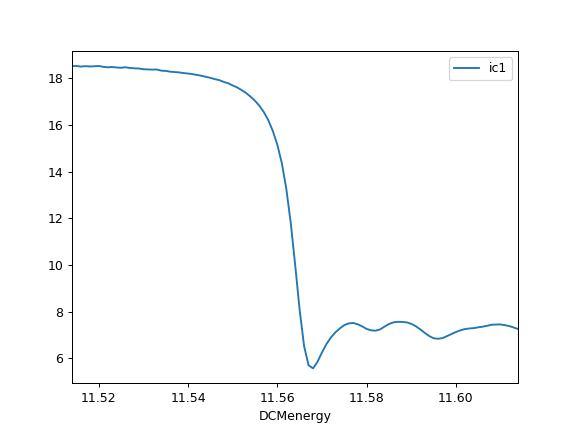

In [11]:
n = pdnx(p % 823290) # energy calibration (0.2 eV change but previous was noisy)
n.plot('DCMenergy','ic1')


Crystal properties

                    CIF file:  /home/spc93/spc_cifs/MnF2.cif
                     Lattice:  4.874 4.874 3.311 90.00 90.00 90.00
                   All sites:  Mn1, F1
               Site selected:  Mn1
                 Site vector:  0.000 0.000 0.000
       No. of spacegroup ops:  16
      No. of sym ops at site:  8
 No. of equiv. sites in cell:  2
   No. of pg ops for crystal:  16


<IPython.core.display.Javascript object>


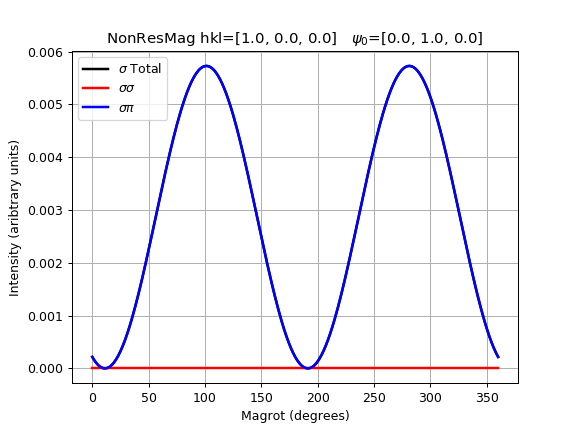

=== tth: 22.44 deg


<IPython.core.display.Javascript object>


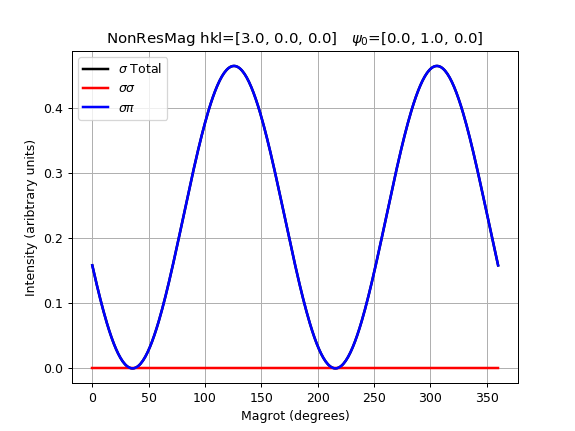

=== tth: 71.41 deg


<IPython.core.display.Javascript object>


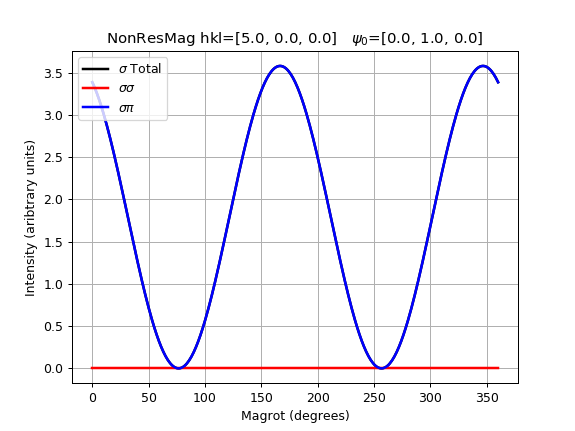

=== tth: 153.17 deg


<IPython.core.display.Javascript object>


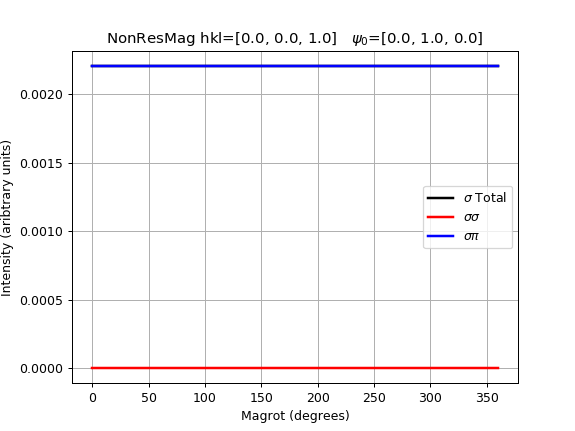

=== tth: 33.28 deg


<IPython.core.display.Javascript object>


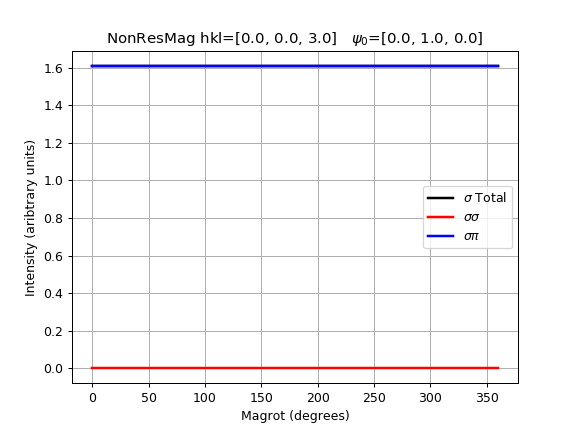

=== tth: 118.45 deg


<IPython.core.display.Javascript object>


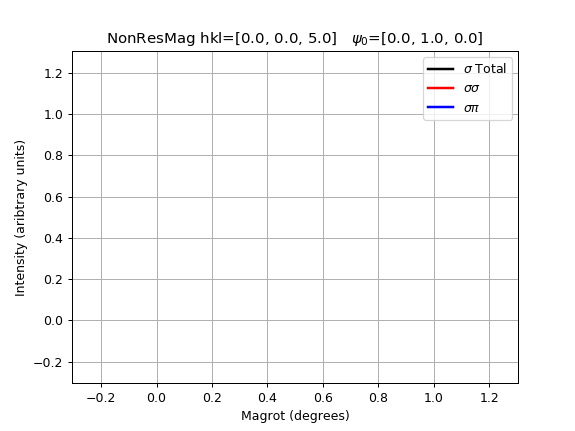

=== tth: nan deg


In [12]:
import TensorScatteringClass as ten
cifpath = '/home/spc93/spc_cifs/'

ciffile=cifpath+'MnF2.cif'
en = MnK = 6.539

t=ten.TensorScatteringClassMagrotExtension(CIFfile=ciffile, Site='Mn1');

# magnetic scattering

#t.PlotIntensityVsPolarizationAnalyserRotation('Scalar', lam = 12.4/en, hkl = np.array([0,0,6]), hkln = np.array([1,0,0]), psideg = 0, pol_eta_deg=range(181), K=None, Time=None, Parity=None, mk=None, lk=np.array([.0,0,0]), sk=np.array([.1,0,0]) , savefile=None)
#t.PlotIntensityVsPolarizationAnalyserRotation('NonResMag', lam = 12.4/en, hkl = np.array([0,0,3]), hkln = np.array([1,0,0]), psideg = 0, pol_eta_deg=range(181), K=None, Time=None, Parity=None, mk=None, lk=np.array([.0,0,0]), sk=np.array([.1,0,0]) , savefile=None)
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/en, hkl=np.array([1,0,0]), hkln=np.array([0,1,0]), psideg=0, lk=np.array([0,0,0]), sk=np.array([1,0,0]), sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/en, hkl=np.array([3,0,0]), hkln=np.array([0,1,0]), psideg=0, lk=np.array([0,0,0]), sk=np.array([1,0,0]), sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/en, hkl=np.array([5,0,0]), hkln=np.array([0,1,0]), psideg=0, lk=np.array([0,0,0]), sk=np.array([1,0,0]), sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/en, hkl=np.array([0,0,1]), hkln=np.array([0,1,0]), psideg=0, lk=np.array([0,0,0]), sk=np.array([0,0,1]), sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/en, hkl=np.array([0,0,3]), hkln=np.array([0,1,0]), psideg=0, lk=np.array([0,0,0]), sk=np.array([0,0,1]), sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannelsVsMagrot('NonResMag', lam=12.4/en, hkl=np.array([0,0,5]), hkln=np.array([0,1,0]), psideg=0, lk=np.array([0,0,0]), sk=np.array([0,0,1]), sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))






Crystal properties

                    CIF file:  /home/spc93/spc_cifs/MnF2.cif
                     Lattice:  4.874 4.874 3.311 90.00 90.00 90.00
                   All sites:  Mn1, F1
               Site selected:  Mn1
                 Site vector:  0.000 0.000 0.000
       No. of spacegroup ops:  16
      No. of sym ops at site:  8
 No. of equiv. sites in cell:  2
   No. of pg ops for crystal:  16

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 0.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


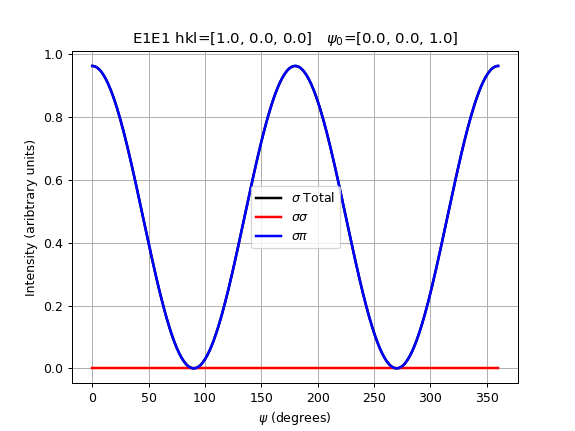

=== tth: 22.44 deg

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [3.0, 0.0, 0.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


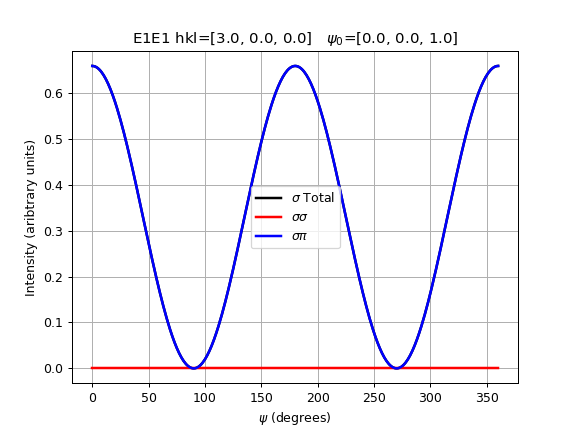

=== tth: 71.41 deg

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [5.0, 0.0, 0.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


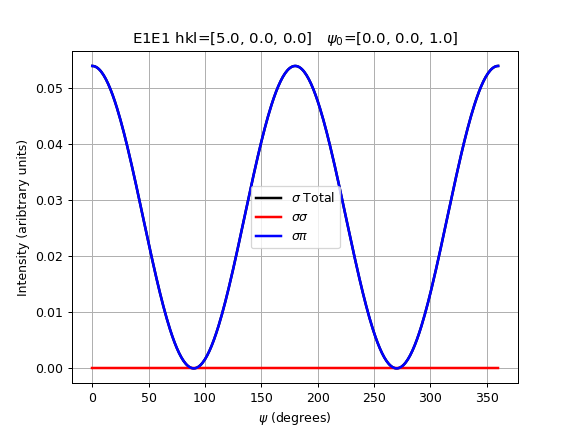

=== tth: 153.17 deg

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


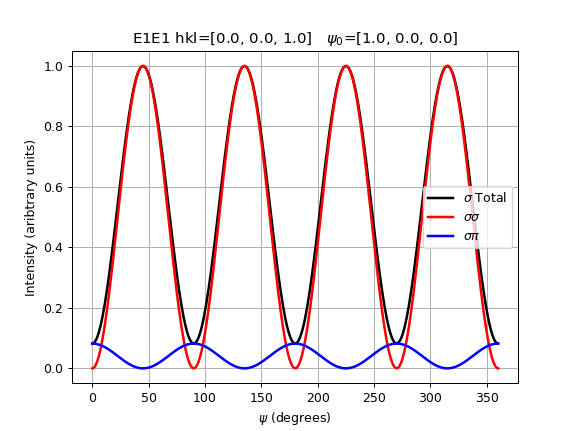

=== tth: 33.28 deg

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


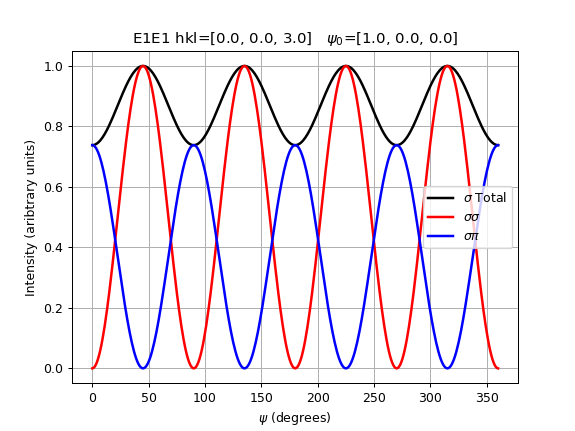

=== tth: 118.45 deg

Tensor components

         Crystal (spherical):  [ 0.+0.j -0.+0.j  1.+0.j  0.+0.j  0.-0.j]
            Atom (spherical):  [ 0.+0.228j -0.+0.j     1.+0.j     0.+0.j     0.-0.228j]
  Struct. factor (spherical):  [ 1.-0.j  0.+0.j  0.-0.j  0.+0.j -1.-0.j]

Crystal (Cartesian):

[[-5.33 +0.j -0.   +0.j -0.   +0.j]
 [-0.   +0.j -5.33 +0.j -0.   +0.j]
 [-0.   +0.j -0.   +0.j 10.659+0.j]]

Atom (Cartesian):

[[-2.665+0.j -1.488+0.j -0.   +0.j]
 [-1.488+0.j -2.665+0.j -0.   +0.j]
 [-0.   +0.j -0.   +0.j  5.33 +0.j]]

Struct. factor (Cartesian):

[[-0.+0.j  1.-0.j -0.+0.j]
 [ 1.-0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j -0.-0.j]]


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 5.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  E

<IPython.core.display.Javascript object>


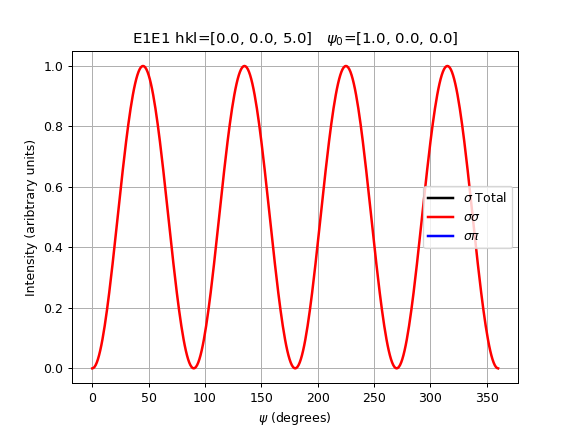

=== tth: nan deg

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [1.0, 0.0, 2.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


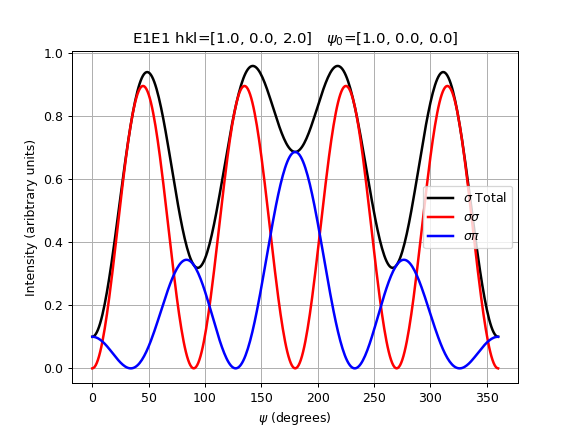

=== tth: 74.45 deg

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


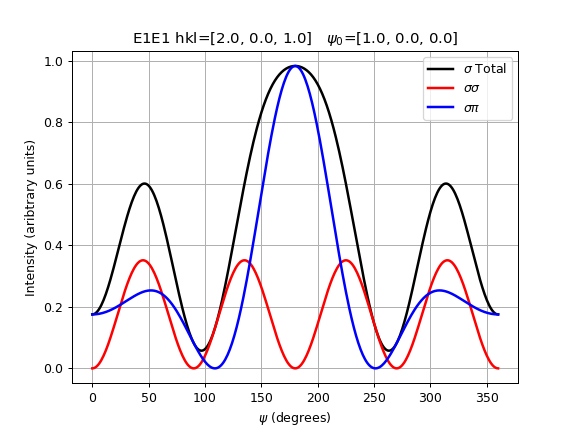

=== tth: 57.78 deg

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 3.0, 2.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


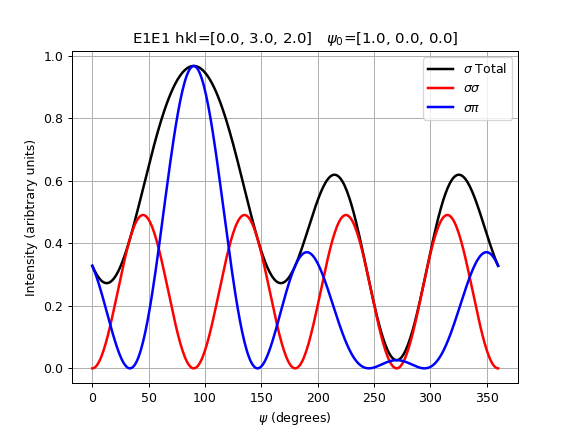

=== tth: 109.72 deg

Tensor components

         Crystal (spherical):  [0.+0.j 0.-0.j 1.+0.j 0.-0.j 0.+0.j]
            Atom (spherical):  [ 1.+0.j     0.+0.j     0.-0.126j  0.-0.j    -1.-0.j   ]
  Struct. factor (spherical):  [ 1.-0.j  0.+0.j  0.-0.j  0.-0.j -1.-0.j]

Crystal (Cartesian):

[[-0.515+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j -0.515+0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  1.03 +0.j]]

Atom (Cartesian):

[[-0.257+0.j -5.013+0.j -0.   +0.j]
 [-5.013+0.j -0.257+0.j -0.   +0.j]
 [-0.   +0.j -0.   +0.j  0.515+0.j]]

Struct. factor (Cartesian):

[[-0.+0.j  1.-0.j  0.+0.j]
 [ 1.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.-0.j]]


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [2.0, 0.0, 3.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either

<IPython.core.display.Javascript object>


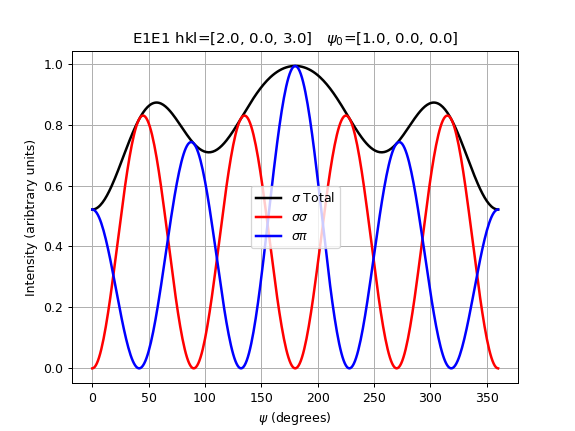

=== tth: 141.18 deg


In [141]:
import TensorScatteringClass as ten
cifpath = '/home/spc93/spc_cifs/'

ciffile=cifpath+'MnF2.cif'
en = MnK = 6.539

#resonant scattering

t=ten.TensorScatteringClassMagrotExtension(CIFfile=ciffile, Site='Mn1');

t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([1,0,0]), hkln=np.array([0,0,1]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([3,0,0]), hkln=np.array([0,0,1]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([5,0,0]), hkln=np.array([0,0,1]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([0,0,1]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([0,0,3]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.print_tensors()
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([0,0,5]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))

t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([1,0,2]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([2,0,1]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([0,3,2]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))
t.print_tensors()
t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/en, hkl=np.array([2,0,3]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma'); print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))



In [6]:
t.theta * 2 *180./np.pi

nan

In [7]:
print('=== tth: %.2f deg' % (t.theta * 2 *180./np.pi))

=== tth: nan deg


In [8]:
t.theta

nan